## 1. Check installed Python packages

In [15]:
!pip list

Package                            Version
---------------------------------- -------------------
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 2.0.4
anaconda-project                   0.9.1
anyio                              2.2.0
appdirs                            1.4.4
applaunchservices                  0.2.1
appnope                            0.1.2
appscript                          1.1.2
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astroid                            2.5
astropy                            4.2.1
asttokens                          2.0.5
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              20.3.0
autopep8                           1.5.6
Babel                              2.9.0
backcall                           0.2.0
backports.functools-lru-cache      1.6.4

## 2. Import Packages

In [16]:
import warnings
warnings.filterwarnings("ignore")

import nelpy as nel # https://github.com/nelpy/nelpy (pip through github link)
import pandas as pd
import scipy.ndimage.filters # Need to update through pip install --upgrade
import os
import sys
import warnings
import numpy as np
import pickle
import random

import copy
import matplotlib.pyplot as plt

## 3. Load Data

In [17]:
jar = nel.load_pkl('final_project_data.nel') # we load the spike and position data

In [18]:
jar

{'metadata': {'source': 'gor01vvp01pin01_processed_speed.nel',
  'session': '16-40-19',
  'data_names': ['pos1d', 'spikes']},
 'pos': <AnalogSignalArray at 0x7fe1d7489310: 1 signals (2 segments)> for a total of 41:50 minutes,
 'spikes': <SpikeTrainArray at 0x7fe1d6e0b700: 117 units (2 segments)> at 32552 Hz from 2006-6-07_16-40-19}

In [19]:
spikes = jar['spikes'].bin(ds=.1)
spikes.data.shape

(117, 25099)

In [20]:
spikes.n_events

array([ 27573,    436,  81908,    563,    419,   3139,    269,   7998,
          603,   5341,   3922,  36055,   2118,   2209,   1667,    219,
        38562,    180,    169,    564,  64219,   3064,   1361,   4210,
          276,   1286,     84,   5961,    240,   1883,     39,    693,
            3,   2617,    765,  20330,   2243,    148,    397,    202,
          932,   6953,   2295,   1302,    139,   5086,    357,    184,
         1048,   2068,     34,  16016,   3209,  86110,   1017,   2862,
         4455,  26662,   7413,  18152,   1020,  19094,  27126,   5016,
         5207,    132,   2296, 100992,    726,   2143,   1345,   3975,
           86,   2996,  70500,    409,   1280,    353,    583,     89,
          336,   1320,   4224,    374,     15,   3060,    141,    483,
          364,   3227,    518,     67,   1231,   1730,   5434,      6,
          947,    258,  60302,  17321,    725,    136,   9796,   1030,
         5032,   1791,  89523,    227,  11488,   2310,   2526,    606,
      

Text(0, 0.5, 'Spike')

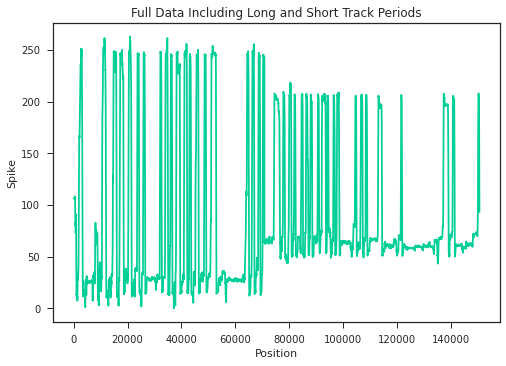

In [21]:
pos = jar['pos']
plt.plot(pos.data.squeeze())
plt.title('Full Data Including Long and Short Track Periods')
plt.xlabel('Position')
plt.ylabel('Spike')

Nelpy epochs in data
 [[   0 1180]
 [1250 2580]]


Text(0, 0.5, 'Spike')

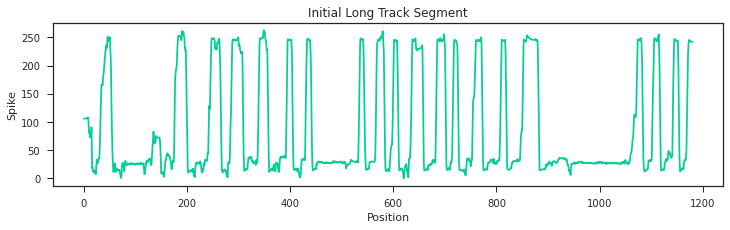

In [23]:
# Get data only for long track portion of experiment
print('Nelpy epochs in data\n', pos.support.time) #For the position data, the different sleep, run epochs define a 7 member EpochArray, which can be accessed using pos.support.

long_track_pos = pos[[0],:] # nelpy indexing by first set of data
long_track_spikes = spikes[[0],:]
tvals, vals = long_track_pos.asarray() # Access timestamps and channel data as numpy arrays
fig, ax = plt.subplots(1,1,figsize=(12,3))
ax.plot(tvals, vals)
ax.set_title('Initial Long Track Segment')
ax.set_xlabel('Position')
ax.set_ylabel('Spike')

Text(0, 0.5, 'Spped')

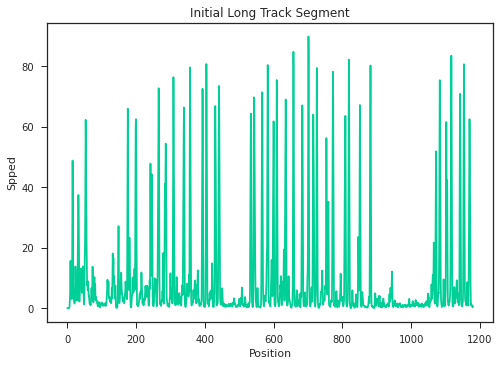

In [26]:
# Can we use speed to find the lap boundaries?

# Calculate the speed by taking the derivative of the position
sigma_500ms = 0.5
speed = nel.utils.ddt_asa(long_track_pos, smooth=True, sigma=sigma_500ms)
tvals, vals = speed.asarray()
plt.plot(tvals, vals)
plt.title('Initial Long Track Segment')
plt.xlabel('Position')
plt.ylabel('Spped')

In [10]:
# get_run_epochs is a utility function which wraps a speed threshold. This finds periods where the speed
#   is greater than v2 and reaches at least a maximum of v1.
run_epochs = nel.utils.get_run_epochs(speed, v1=35, v2=3) # original choice
print((run_epochs.time.shape[0]))
print(run_epochs.time)

# This looks about right - there seem to be 19.5 full laps, which would be 39 half laps
# and we find 40 epochs.

40
[[   7.76666667   20.33333333]
 [  29.33333333   35.06666667]
 [  49.35         63.9       ]
 [ 166.86666667  183.56666667]
 [ 187.46666667  202.68333333]
 [ 238.53333333  248.46666667]
 [ 261.26666667  269.1       ]
 [ 281.53333333  289.73333333]
 [ 306.26666667  311.75      ]
 [ 332.11666667  341.8       ]
 [ 346.76666667  360.36666667]
 [ 390.45        396.01666667]
 [ 401.71666667  407.58333333]
 [ 427.26666667  433.48333333]
 [ 438.01666667  444.78333333]
 [ 530.88333333  537.        ]
 [ 540.63333333  547.75      ]
 [ 563.68333333  570.01666667]
 [ 577.41666667  585.76666667]
 [ 591.48333333  602.25      ]
 [ 606.2         612.4       ]
 [ 631.71666667  637.93333333]
 [ 654.95        660.48333333]
 [ 678.8         686.35      ]
 [ 697.15        704.31666667]
 [ 712.55        718.71666667]
 [ 722.5         728.78333333]
 [ 748.6         760.75      ]
 [ 769.38333333  775.31666667]
 [ 804.88333333  810.88333333]
 [ 815.76666667  821.61666667]
 [ 844.66666667  853.53333333]
 [ 87

In [11]:
print(pos)

<AnalogSignalArray at 0x7fe1ee96e2b0: 1 signals (2 segments)> for a total of 41:50 minutes


tvals [0.00000000e+00 1.66666667e-02 3.33333333e-02 ... 2.57995000e+03
 2.57996667e+03 2.57998333e+03]
vals [106.09528334 106.09543469 106.0957531  ...  93.67515376  93.40600155
  93.26979987]


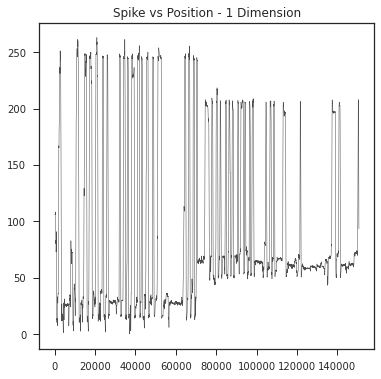

In [57]:
import nelpy.plotting as npl
# Set default figure aesthetics
npl.setup(font_scale=1)

with npl.FigureManager(show=True, figsize=(6, 6)) as (fig, ax):
    npl.utils.skip_if_no_output(fig)

    tvals, vals = pos.asarray() # Access timestamps and channel data as numpy arrays
    print("tvals", tvals)
    print("vals", vals)
    ax.plot(vals, lw=0.5, c='0.3')
    ax.set_title('Spike vs Position - 1 Dimension')

In [65]:
# Calculate run epochs for both sessions in the same maze
sessions = [1,3]
all_run_epochs = nel.EpochArray()
for s in sessions:
    _speed = nel.utils.ddt_asa(long_track_pos, smooth=True, sigma=sigma_500ms)
    _speed.data = (speed.data**2).sum(axis=0,keepdims=True)

    _run_epochs = nel.utils.get_run_epochs(speed, v1=8, v2=3) # original choice
    all_run_epochs += _run_epochs

## Binned spike trains

In [66]:
st_run = S[all_run_epochs]

# Bin sizes are 500 ms, and then we sli 
ds_run = 0.250 # 250 ms
ds_50ms = 0.05

# bin, smooth and re-bin:
sigma = 0.3 # 300 ms spike smoothing
bst_run = st_run.bin(ds=ds_50ms).smooth(sigma=sigma, inplace=True).rebin(w=ds_run/ds_50ms)

In [77]:
long_track_pos = pos[[0],:] # nelpy indexing by first set of data for first, long track segment

S = jar['spikes'] # not binned!
long_track_spikes = S[[0],:] # nelpy indexing by first set of data for first, long track segment

# Bins for tuning curves
x_extents = [0,265] # Read these off of maze figure above
nx = int(np.diff(x_extents)/5) # plan for 5 cm bins

min_duration = 1 # require that estimation periods be at least 1 second long

tc = nel.TuningCurve1D(bst=bst_run, extern=long_track_pos, 
                       extmin=x_extents[0], extmax=x_extents[1], 
                       n_extern=nx, min_duration=min_duration)
print(dir(tc))

['__add__', '__attributes__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__mul__', '__ne__', '__new__', '__next__', '__reduce__', '__reduce_ex__', '__repr__', '__rmul__', '__setattr__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__truediv__', '__weakref__', '_bins', '_bst', '_compute_occupancy', '_compute_ratemap', '_detach', '_extern', '_get_peak_firing_order_idx', '_init_from_ratemap', '_label', '_min_duration', '_normalize_firing_rate_by_occupancy', '_occupancy', '_ratemap', '_reorder_units_by_idx', '_trans_func', '_unit_ids', '_unit_labels', '_unit_subset', '_unit_tags', 'bin_centers', 'bins', 'get_peak_firing_order_ids', 'is2d', 'isempty', 'label', 'max', 'mean', 'min', 'n_bins', 'n_units', 'normalize', 'occupancy', 'ratemap', 'reorder_units', 'reorder_units_by_ids', 's

In [82]:
placefield = tc.ratemap[unit_id].T
ax, img = npl.imagesc(tc, 
                      data=placefield,
                      cmap=plt.cm.Greens)
ax.plot(xvals, yvals, lw=0.5, c='0.2', alpha=0.2)
#ax.plot(pos_at_spikes[0,:], pos_at_spikes[1,:], '.', color='tomato', alpha=0.25)

# Tinker to get the colorbar in the right place
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3.5%", pad=0.1)
cb=plt.colorbar(img, cax=cax)
npl.utils.no_yticks(cax)

NameError: name 'xvals' is not defined